# use digit dataset and perform LogisticRegression.

(1797, 64)


<Figure size 432x288 with 0 Axes>

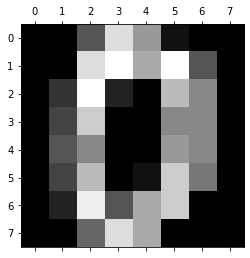

In [30]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
plt.gray()
plt.matshow(digits.images[0]) 
plt.show() 


In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [4]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [5]:
import pandas as pd 
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
df.columns = digits.feature_names
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
df.shape

(1797, 64)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test = train_test_split(digits.data, digits.target, stratify = digits.target, random_state = 2, test_size = 0.3)

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

y_pred = log_reg.predict(X_test)

print('Accuracy score of training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy score of testing set: {:.3f}'.format(log_reg.score(X_test,y_test)))

Accuracy score of training set: 1.000
Accuracy score of testing set: 0.956


F:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
df=pd.DataFrame() 
df['y_test'] = y_test
df['y_pred'] = y_pred
df.head()

,y_test,y_pred
0,4,4
1,0,0
2,4,4
3,3,3
4,5,5


In [10]:
mislabel = np.sum(y_test != y_pred)
print("the total no. of mislabelled datapoints from {} test sample is {} ".format(len(y_test),mislabel))

the total no. of mislabelled datapoints from 540 test sample is 24 


In [11]:
516/540

0.9555555555555556

In [12]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy is:{Accuracy:4.2f}")


Accuracy is:0.96


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
digits = load_digits()
x = digits.data
y = digits.target

In [14]:
print(x)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [15]:
print(y)

[0 1 2 ... 8 9 8]


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 2, test_size = 0.2)

dct= DecisionTreeClassifier(random_state=0)
dct.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [17]:
y_pred = dct.predict(X_test)

In [18]:
y_pred

array([1, 0, 9, 1, 9, 7, 1, 5, 1, 6, 6, 7, 6, 2, 5, 5, 9, 6, 2, 7, 4, 6,
       4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 8, 0, 8, 5, 8, 0, 6, 8, 1, 5, 7,
       9, 6, 9, 6, 1, 3, 0, 1, 9, 7, 3, 3, 1, 1, 8, 1, 9, 8, 5, 9, 9, 1,
       7, 5, 8, 4, 3, 9, 3, 8, 7, 3, 3, 0, 8, 7, 2, 1, 5, 8, 8, 7, 6, 4,
       6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 7, 8, 2, 8, 6, 4, 6, 7, 3, 7, 3, 8,
       4, 7, 0, 9, 5, 2, 5, 9, 3, 9, 2, 8, 5, 2, 0, 8, 1, 9, 2, 1, 3, 1,
       0, 3, 4, 8, 0, 9, 3, 2, 2, 7, 3, 1, 2, 7, 2, 8, 3, 1, 1, 6, 4, 8,
       2, 1, 8, 4, 8, 3, 7, 1, 9, 3, 4, 9, 7, 4, 8, 9, 5, 7, 6, 9, 8, 0,
       4, 0, 0, 9, 0, 6, 5, 8, 8, 9, 7, 7, 2, 0, 8, 3, 7, 3, 0, 2, 1, 8,
       2, 7, 0, 6, 9, 3, 3, 1, 3, 5, 2, 8, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5,
       9, 7, 1, 3, 9, 6, 3, 7, 1, 7, 5, 8, 7, 6, 4, 5, 5, 4, 2, 6, 6, 2,
       2, 4, 3, 7, 7, 0, 9, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 9, 1, 2,
       5, 1, 4, 0, 9, 1, 5, 5, 7, 4, 0, 1, 0, 3, 5, 5, 5, 4, 0, 7, 8, 6,
       2, 1, 1, 1, 7, 9, 4, 7, 9, 7, 0, 4, 9, 6, 9,

In [19]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy:{Accuracy:4f}')

Accuracy:0.833333


In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cmdf = pd.DataFrame(cm,index = digits.target_names,columns=digits.target_names)

In [21]:
cmdf

,0,1,2,3,4,5,6,7,8,9
0,30,0,0,0,0,0,0,0,1,1
1,0,37,1,1,0,0,0,2,2,1
2,0,0,28,1,0,0,1,0,1,0
3,0,0,0,26,0,1,0,1,4,4
4,1,1,0,0,26,0,0,1,1,5
5,0,0,0,3,1,36,0,0,3,0
6,0,0,1,0,2,0,31,1,0,0
7,0,1,0,0,2,0,0,36,1,0
8,0,3,3,1,0,0,0,1,27,1
9,0,0,0,1,0,1,0,1,2,23


In [22]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')


0.8377095353597456

In [23]:
precision_score(y_test, y_pred, average='micro')

0.8333333333333334

In [24]:
precision_score(y_test, y_pred, average='weighted')

0.8428485372635451

In [25]:
precision_score(y_test, y_pred, average=None)

array([0.96774194, 0.88095238, 0.84848485, 0.78787879, 0.83870968,
       0.94736842, 0.96875   , 0.8372093 , 0.64285714, 0.65714286])

In [26]:
precision_score(y_test, y_pred, average=None, zero_division=1)

array([0.96774194, 0.88095238, 0.84848485, 0.78787879, 0.83870968,
       0.94736842, 0.96875   , 0.8372093 , 0.64285714, 0.65714286])

### multi class precision avg is getting not possible here,so wanna make into simple classifier with svm

In [27]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

digits = datasets.load_digits() 
X = digits.data
y = digits.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples,n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)] 


# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)


### And here goes average precision for multi class target variables 

In [28]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


Average precision-recall score: 1.00


## Plot the Precision-Recall curve¶


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

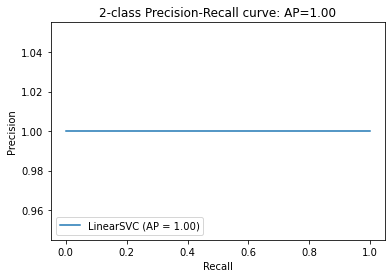

In [29]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))


In [31]:
from sklearn.model_selection import KFold, cross_val_score, validation_curve
from sklearn import linear_model

logreg = linear_model.LogisticRegression()

kfold = KFold(n_splits=5,random_state=7)

cv_results = cross_val_score(logreg, X_train,y_train, cv=kfold)
print (cv_results.mean()*100, "%")


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


100.0 %


# Alternative method for multiclass 

In [34]:
# Load libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.model_selection import train_test_split


# Load data
iris = datasets.load_digits()
features = digits.data
target = digits.target

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)


X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, random_state=42)


In [35]:
#Create one-vs-rest logistic regression object
log_reg = LogisticRegression(random_state=0, multi_class="ovr") #multi_class='multinomial'

log_reg.fit(X_train, y_train)

y_pred=log_reg.predict(X_test)


F:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [36]:
import pandas as pd
df_predicted=pd.DataFrame()
df_predicted['Actual']=y_test
df_predicted['Predicted']=y_pred
df_predicted.head()


,Actual,Predicted
0,1,8
1,0,0
2,9,9
3,1,1
4,5,5


In [37]:
import numpy as np
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))


Total number of mislabelled data points from 450 test samples is 18


In [38]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print("Accuracy of test set=",accuracy_score(y_test, y_pred)*100)


Accuracy of test set= 96.0


In [39]:
from sklearn.metrics import confusion_matrix
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=digits.target_names, columns=digits.target_names)
print("The confusion matrix looks like following...\n")
cmdf


The confusion matrix looks like following...



,0,1,2,3,4,5,6,7,8,9
0,44,0,0,0,1,0,0,0,0,0
1,0,43,0,1,0,0,1,0,1,0
2,0,1,43,0,0,0,0,0,0,0
3,0,0,0,46,0,0,0,0,0,0
4,0,0,0,0,45,0,0,0,0,0
5,0,0,0,0,0,45,0,0,0,1
6,0,1,0,0,0,0,43,0,1,0
7,0,0,0,0,1,0,0,44,0,0
8,0,5,0,0,0,0,0,0,38,0
9,1,0,0,0,0,0,0,1,2,41


In [40]:
from sklearn.dummy import DummyClassifier

# Create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)

# "Train" model
dummy.fit(X_train, y_train)

# Get accuracy score
dummy.score(X_test, y_test)


0.08444444444444445